# 1. Hipótese: a energia renovável favorece o desenvolvimento econômico

A transição para a energia renovável é frequentemente vista sob a lente da sustentabilidade ambiental. No entanto, seu impacto vai além, desempenhando um papel crucial no desenvolvimento econômico, especialmente em países emergentes e em desenvolvimento. Esta hipótese sustenta que o aumento no uso de energias renováveis pode levar a melhorias significativas na balança comercial, aumento da renda, e melhores condições de vida. O coração desta proposição reside no potencial das energias renováveis de alterar positivamente os fundamentos econômicos, estimulando a autossuficiência energética, criando empregos, fomentando tecnologias inovadoras e possibilitando avanço técnico em países com menor desenvolvimento.<br>
<br>

**Metodologia** Os elementos selecionados para avaliar esta hipótese incluem a participação de energia renovável no consumo total de energia, o acesso à eletricidade, o crescimento do PIB, o PIB per capta e o fluxo de investimentos financeiros. Serão feitas análises estatísticas para avaliar a correlação dessas variáveis, comparação entre países, e testes com as ferramentas disponíveis. <br>
<br>

**Detalhamento** Para países emergentes e em desenvolvimento, onde a segurança energética e o acesso a fontes de energia confiáveis são muitas vezes desafios, a energia renovável representa uma oportunidade de ouro. Ao investir em fontes de energia renovável, esses países podem reduzir a dependência de importações de combustíveis fósseis voláteis, promovendo uma maior estabilidade econômica. Além disso, a energia renovável tem o potencial de ser mais democrática e acessível, alcançando comunidades remotas e pobres, facilitando assim o desenvolvimento econômico inclusivo.<br>
Sugerimos que o investimento em energias renováveis pode ser um catalisador para o crescimento econômico. Este crescimento é impulsionado pela criação de empregos no setor de energias renováveis, pela inovação tecnológica, e pelo aumento da competitividade em indústrias energéticas emergentes. Além disso, o acesso ampliado à energia pode ajudar a aliviar a pobreza, possibilitando melhorias na saúde, na educação e em outras áreas vitais para o desenvolvimento humano.<br>

**Fonte:** Global Data on Sustainable Energy <br>
https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy 

# 2. Carga das Ferramentas

In [122]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go

In [123]:
# Carregando o dataset
path_dataset = r'https://raw.githubusercontent.com/Felipefalex/Projeto-Sustainable-Energy/main/global-data-on-sustainable-energy%20(1).csv'
data = pd.read_csv(path_dataset)

# Exibindo as primeiras linhas do dataset para inspeção inicial
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


# 3. Análise dos Dados

A primeira fase do projeo é a análise da estrutura dos dados: quais são as informações disponíveis, como estão elencadas e qual seu comportamento.

In [124]:
# Tamanho do dataset e tipos de dados de cada coluna
dataset_info = data.info()
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [125]:
# Quantidade e nome dos países
nomes_paises = data['Entity'].unique()
quantidade_paises = len(data['Entity'].unique())

print(quantidade_paises)
print('\n')
print(nomes_paises)

176


['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lebanon'
 

In [126]:
# Valores vazios
vazios = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
vazios = vazios.rename(columns = {0 : 'Null Values'})
vazios

,Null Values
Renewables (% equivalent primary energy),2137
Financial flows to developing countries (US $),2089
Renewable-electricity-generating-capacity-per-capita,931
Value_co2_emissions_kt_by_country,428
gdp_growth,317
gdp_per_capita,282
Energy intensity level of primary energy (MJ/$2017 PPP GDP),207
Renewable energy share in the total final energy consumption (%),194
Access to clean fuels for cooking,169
Electricity from nuclear (TWh),126


In [127]:
# Colunas de interesse
variáveis_chave = [
    'Renewable energy share in the total final energy consumption (%)',
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Primary energy consumption per capita (kWh/person)',
    'gdp_per_capita',
    'gdp_growth',
    'Financial flows to developing countries (US $)'	
]

# Calculando o número de informações faltantes por país para cada coluna de interesse
valores_faltantes_pais = data[variáveis_chave].isnull().sum(axis=1).groupby(data['Entity']).sum()
valores_faltantes_pais = valores_faltantes_pais.sort_values(ascending=False)

# Exibindo o total de dados faltantes por coluna
print(valores_faltantes_pais.head(25))

Entity
Czechia                             64
Slovakia                            64
New Caledonia                       63
Saint Kitts and Nevis               62
Bahamas                             61
Saint Lucia                         61
Saint Vincent and the Grenadines    59
Gambia                              59
Cayman Islands                      56
Congo                               56
Kyrgyzstan                          51
Aruba                               48
Yemen                               48
Egypt                               44
Bermuda                             43
Puerto Rico                         43
Bulgaria                            43
Libya                               43
Somalia                             43
Albania                             42
Eritrea                             33
Lebanon                             31
Nauru                               31
Djibouti                            24
Qatar                               23
dtype: int64


In [128]:
# Remoção das informações faltantes
# Lista de países a serem removidos
paises_para_remover = [
    "Egypt", "Saint Vincent and the Grenadines", "Saint Lucia", 
    "Saint Kitts and Nevis", "Gambia", "Bahamas", "New Caledonia", 
    "Czechia", "Kyrgyzstan", "Slovakia", "Congo", "Yemen", 
    "Cayman Islands", "Somalia", "Aruba", "Bulgaria", "Bermuda", 
    "Puerto Rico", "Lebanon", "Libya", "Albania", "Eritrea", 
    "Nauru", "Djibouti"
]

# Removendo os países especificados do dataframe
data = data[~data['Entity'].isin(paises_para_remover)]

In [129]:
# Analisando após a remoção
vazios = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
vazios = vazios.rename(columns = {0 : 'Null Values'})
vazios

,Null Values
Renewables (% equivalent primary energy),1717
Financial flows to developing countries (US $),1704
Renewable-electricity-generating-capacity-per-capita,826
Value_co2_emissions_kt_by_country,172
Energy intensity level of primary energy (MJ/$2017 PPP GDP),155
Renewable energy share in the total final energy consumption (%),150
Electricity from nuclear (TWh),126
Low-carbon electricity (% electricity),21
Electricity from fossil fuels (TWh),21
Electricity from renewables (TWh),21


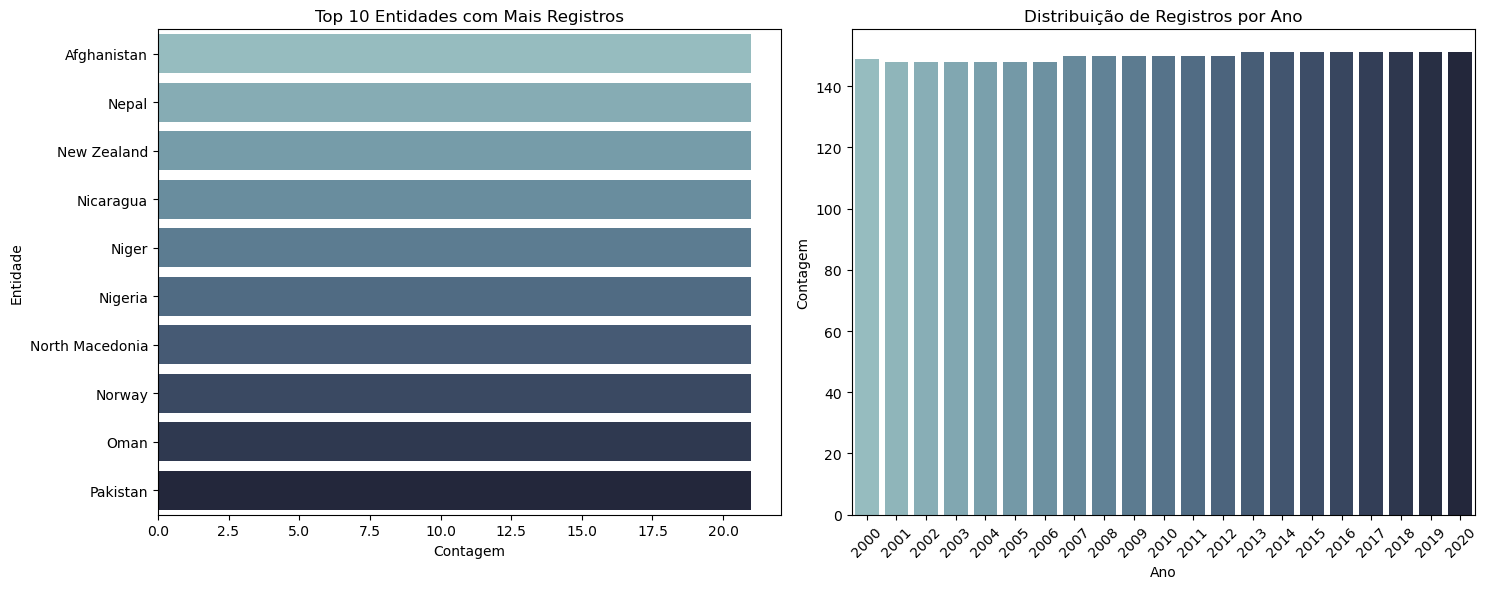

,count,mean,std,min,25%,50%,75%,max
Year,3145.0,2010.04,6.050000e+00,2000.00,2005.00,2010.00,2015.00,2.020000e+03
Access to electricity (% of population),3135.0,77.96,3.105000e+01,1.25,57.57,97.77,100.00,1.000000e+02
Access to clean fuels for cooking,3144.0,63.24,3.891000e+01,0.00,24.00,83.15,100.00,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2319.0,118.12,2.549900e+02,0.00,5.65,36.08,116.55,3.060190e+03
Financial flows to developing countries (US $),1441.0,97336079.11,3.035213e+08,0.00,280000.00,6200000.00,58540000.00,5.202310e+09
Renewable energy share in the total final energy consumption (%),2995.0,34.72,2.982000e+01,0.00,8.62,27.55,57.66,9.604000e+01
Electricity from fossil fuels (TWh),3124.0,79.81,3.740600e+02,0.00,0.35,3.50,31.35,5.184130e+03
Electricity from nuclear (TWh),3019.0,15.29,7.867000e+01,0.00,0.00,0.00,0.00,8.094100e+02
Electricity from renewables (TWh),3124.0,27.49,1.121300e+02,0.00,0.12,1.97,11.84,2.184940e+03
Low-carbon electricity (% electricity),3124.0,39.21,3.407000e+01,0.00,6.95,33.64,66.25,1.000000e+02


In [130]:
# Estatísticas descritivas das variáveis numéricas
estatisticas_numericas = data.describe().round(2).T

# Visualização da distribuição das principais variáveis categóricas
# Países com maiores números de registros
cores_paises = sns.cubehelix_palette(10, rot=-.25, light=.7)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(y=data['Entity'], order=data['Entity'].value_counts().index[:10], palette=cores_paises)
plt.title('Top 10 Entidades com Mais Registros')
plt.ylabel('Entidade')
plt.xlabel('Contagem')

# Distribuição de registros por ano
cores_anos = sns.cubehelix_palette(21, rot=-.25, light=.7)
plt.subplot(1, 2, 2)
sns.countplot(x=data['Year'], palette=cores_anos)
plt.title('Distribuição de Registros por Ano')
plt.ylabel('Contagem')
plt.xlabel('Ano')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

estatisticas_numericas

`Ano`: Os dados abrangem de 2000 a 2020. A distribuição de registros por ano é bastante uniforme, indicando que a maioria dos anos tem uma quantidade similar de dados.<br>
`Acesso à Eletricidade`: Em média, 77.96% da população tinha acesso à eletricidade, com uma variação considerável (desvio padrão de 31%).<br>
`Acesso a Combustíveis Limpos para Cozinhar`: Média de 63.24% com alta variação (desvio padrão de 39%).<br>
`Capacidade de Geração de Eletricidade Renovável Per Capita`: Média de 118.12, mas com grande variação (desvio padrão de 254), indicando diferenças significativas entre países.<br>
`Fluxos Financeiros para Países em Desenvolvimento`: Média alta com um desvio padrão muito grande, sugerindo uma distribuição bastante desigual desses fluxos.<br>
`Consumo de Energia Primária Per Capita`: Os dados variam significativamente entre os países.<br>
`Emissões de CO2`: Variação substancial nas emissões de CO2 entre os países.<br>
`Países`: O gráfico mostra as 10 entidades (países) com mais registros no dataset. Isso pode ser útil para entender quais países têm dados mais completos ou estão mais frequentemente representados.

In [131]:
# Tratamento de valores faltantes
# Substituindo valores faltantes por zeros em colunas financeiras e de energia
colunas_a_preencher = [
    'Financial flows to developing countries (US $)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)'
]

data[colunas_a_preencher] = data[colunas_a_preencher].fillna(0)

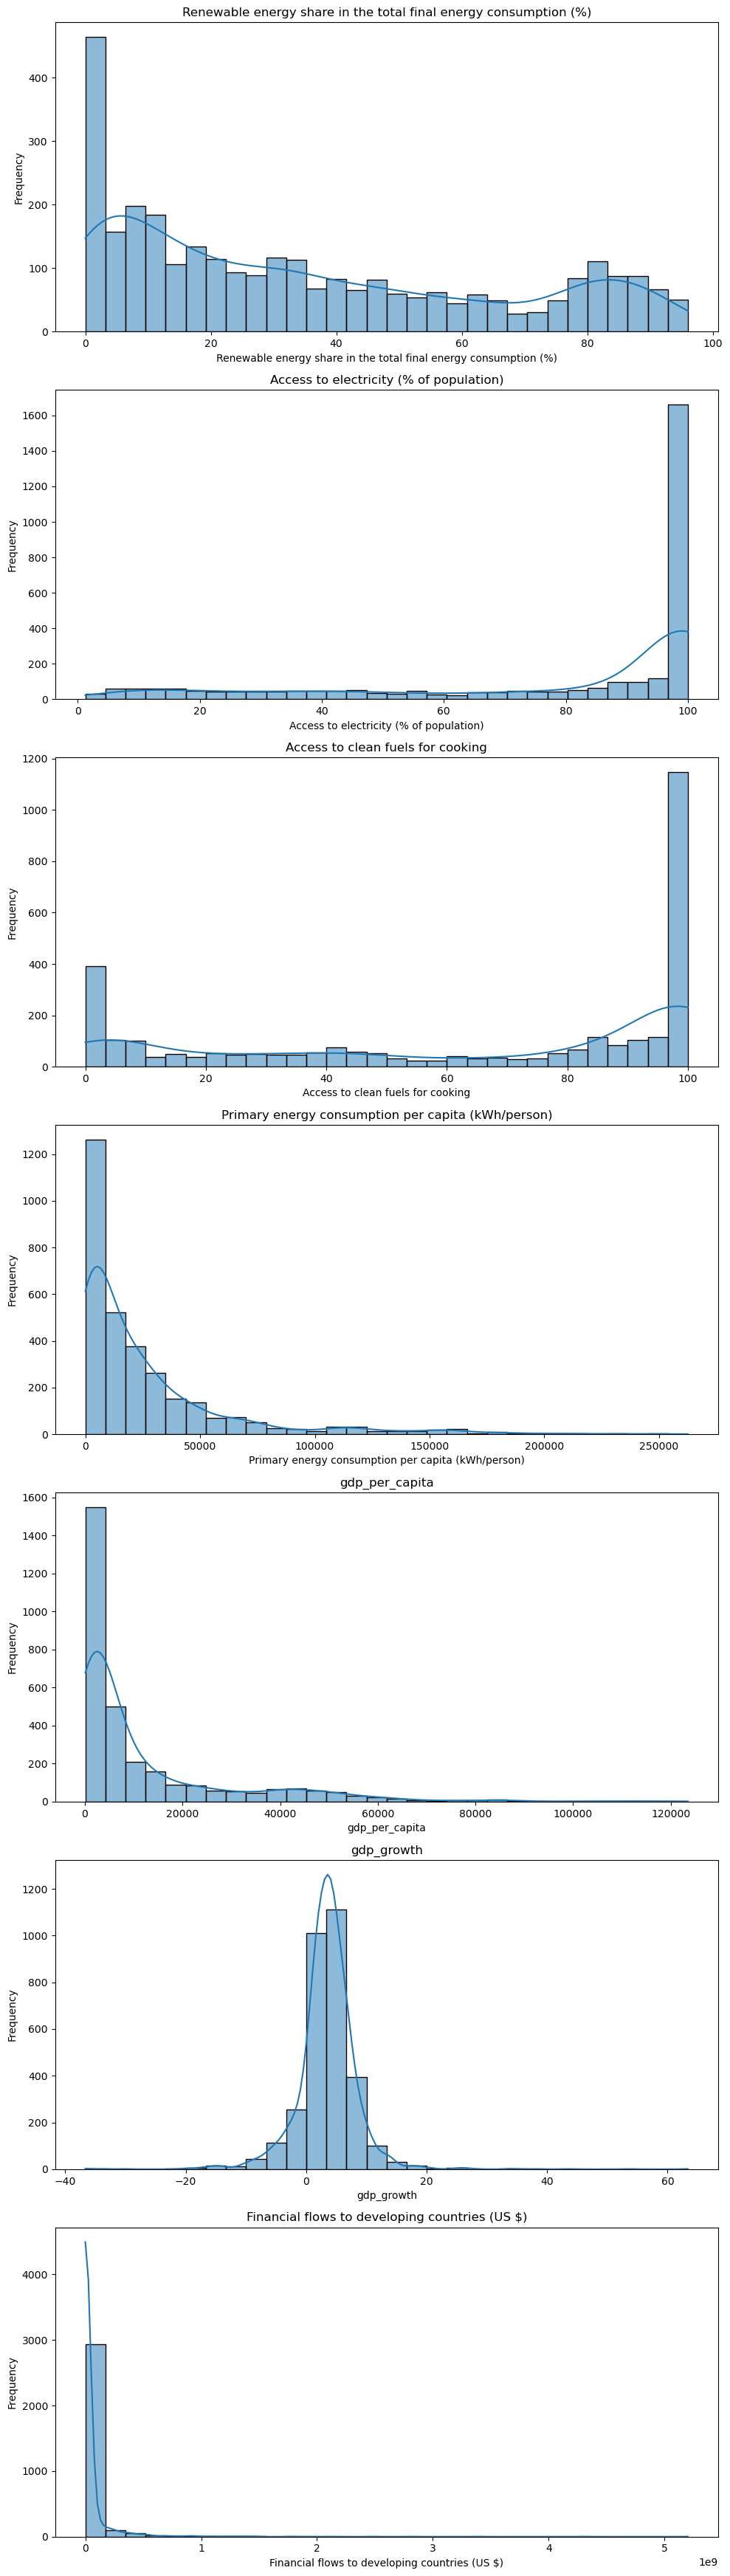

In [132]:
# Visualização Gráfica das Principais Variáveis
# Criando histogramas para cada variável selecionada
fig, axes = plt.subplots(len(variáveis_chave), 1, figsize=(10, 5 * len(variáveis_chave)))

for i, col in enumerate(variáveis_chave):
    sns.histplot(data[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

A maioria das variáveis exibe uma distribuição assimétrica, indicando uma concentração de valores.<br>

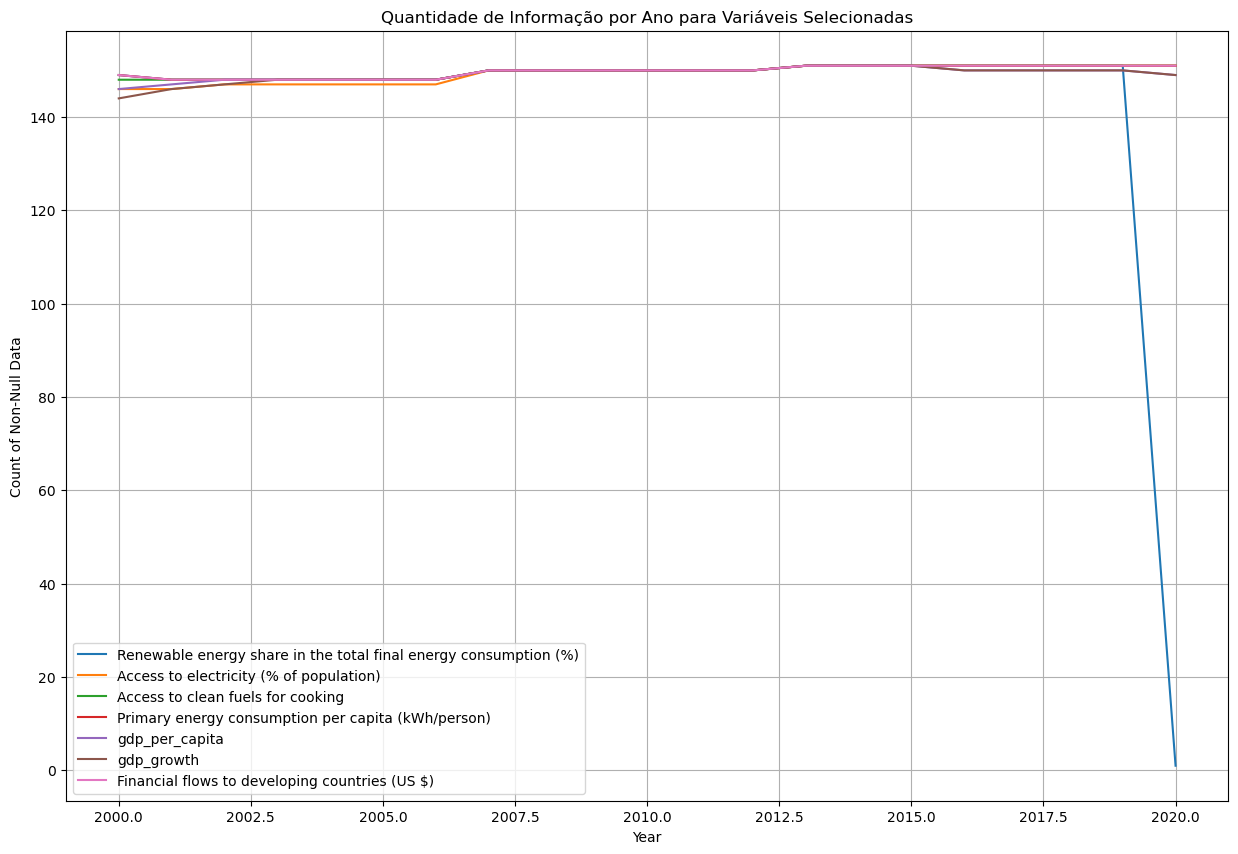

In [133]:
# Contagem de informações não nulas por ano para cada variável
contagem_info = data.groupby('Year')[variáveis_chave].count()

# Plotando o gráfico
plt.figure(figsize=(15, 10))
for var in variáveis_chave:
    plt.plot(contagem_info.index, contagem_info[var], label=var)

plt.xlabel('Year')
plt.ylabel('Count of Non-Null Data')
plt.title('Quantidade de Informação por Ano para Variáveis Selecionadas')
plt.legend()
plt.grid(True)
plt.show()

Sabemos, portanto, que não há dados do percentual de energia renovável para 2020, então precisaremos remover esse ano de nossa análise

In [134]:
# Remoção de 2020
data = data[data['Year'] != 2020]

# Analisando após a remoção
vazios = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
vazios = vazios.rename(columns = {0 : 'Null Values'})
vazios

,Null Values
Renewables (% equivalent primary energy),1634
Renewable-electricity-generating-capacity-per-capita,786
Value_co2_emissions_kt_by_country,21
Low-carbon electricity (% electricity),20
gdp_growth,12
Access to electricity (% of population),10
gdp_per_capita,8
Energy intensity level of primary energy (MJ/$2017 PPP GDP),5
Latitude,1
Land Area(Km2),1


C:\Users\Felipe\AppData\Local\Temp\ipykernel_14876\4158538629.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


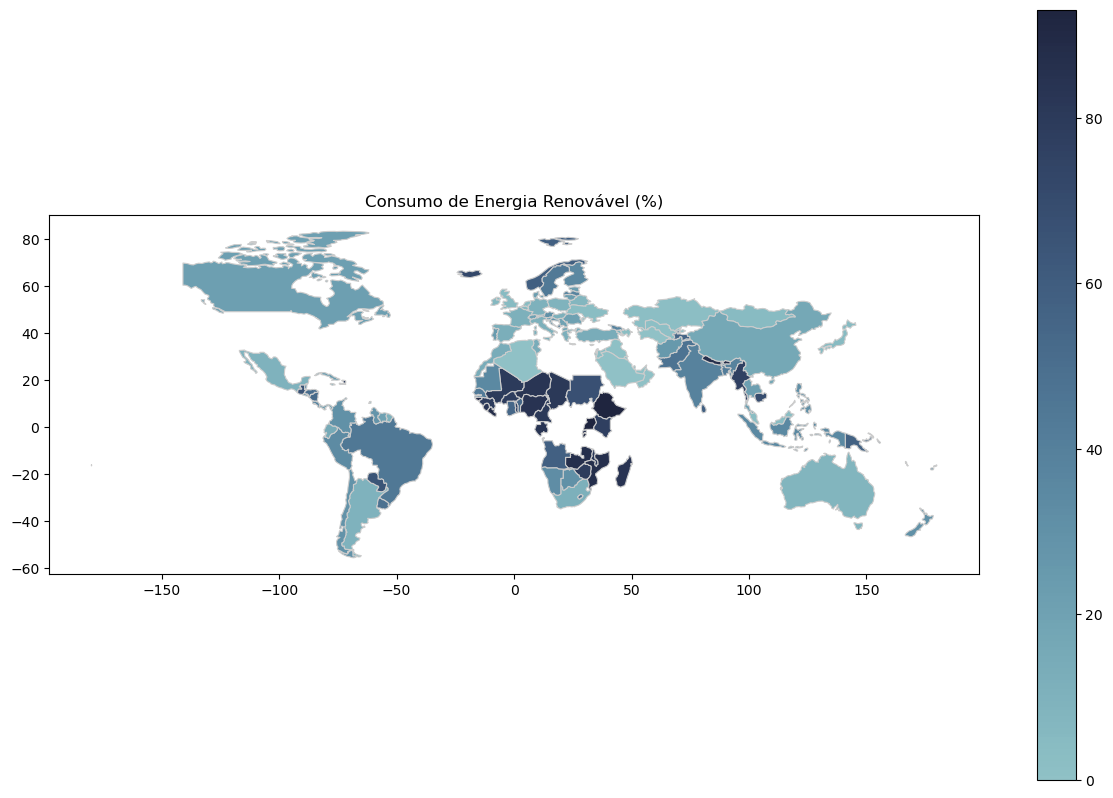

In [138]:
# Carregando um mapa mundial
mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Calculando a média da capacidade de geração de energia renovável per capita por país
media_capacidade_energia_per_capta = data.groupby('Entity')['Renewable energy share in the total final energy consumption (%)'].mean()
energia_renovavel_mundial = mundo.set_index('name').join(media_capacidade_energia_per_capta)

cores_mapa = sns.cubehelix_palette(rot=-.25, light=.7, as_cmap=True)

# Plotando o mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
energia_renovavel_mundial.plot(column='Renewable energy share in the total final energy consumption (%)',
                            cmap=cores_mapa,
                            linewidth=0.8,
                            ax=ax,
                            edgecolor='0.8',
                            legend=True)
ax.set_title('Consumo de Energia Renovável (%)')
plt.show()

# 4. Verificação da Hipótese - Correlação

Vamos começar a investigação dos dados fazendo uma análise de correlação entre o `Percentual de Energia Renovável` e o  `PIB per capta`, o `Crescimento do PIB` e o `Acesso à Eletricidade` 

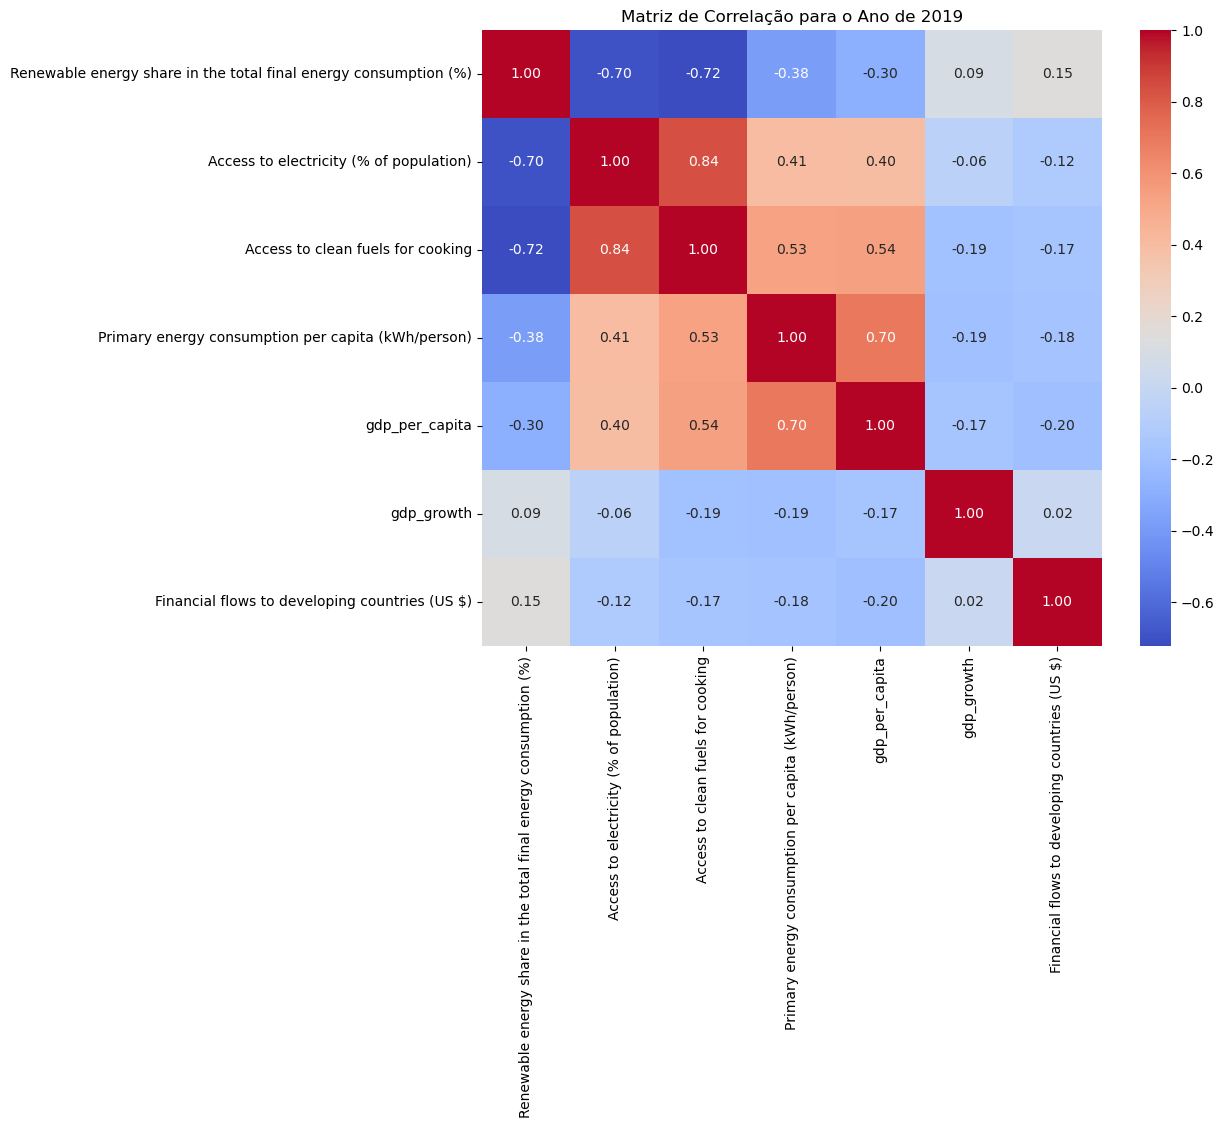

In [136]:
# Definindo as variáveis usadas para a correlação

# Filtrando os dados para o ano mais recente com informações (2019)
data_2019 = data[data['Year'] == 2019]

# Matriz de correlação
matriz_correlacao = data_2019[variáveis_chave].corr()

# Criando matrizes de correlação para cada um dos três últimos anos
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação para o Ano de 2019')
plt.show()

A matriz sugere que existe uma correlação negativa entre o uso de energia renovável e o PIB per Capta, o Acesso à Eletricidade e o Acesso à Combustíveis Limpos para Cozinhar.<br>
Vamos aprofundar a análise removendo os países africanos porque eles possuem o maior percentual de consumo de energia renovável. Retomaremos uma análise exclusiva para eles.

In [142]:
# Lista de países africanos para referência
paises_africanos = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon",
    "Central African Republic", "Chad", "Comoros", "Congo", "Democratic Republic of the Congo",
    "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon",
    "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia",
    "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique",
    "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles",
    "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo",
    "Tunisia", "Uganda", "Zambia", "Zimbabwe"
]

# Filtrando para ver quais países africanos estão no dataset
paises_africanos_presentes = data[data['Entity'].isin(paises_africanos)]['Entity'].unique()

print(paises_africanos_presentes)

['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Equatorial Guinea'
 'Eswatini' 'Ethiopia' 'Gabon' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Kenya'
 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania' 'Mauritius'
 'Morocco' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Rwanda'
 'Sao Tome and Principe' 'Senegal' 'Seychelles' 'Sierra Leone'
 'South Africa' 'South Sudan' 'Sudan' 'Togo' 'Tunisia' 'Uganda' 'Zambia'
 'Zimbabwe']


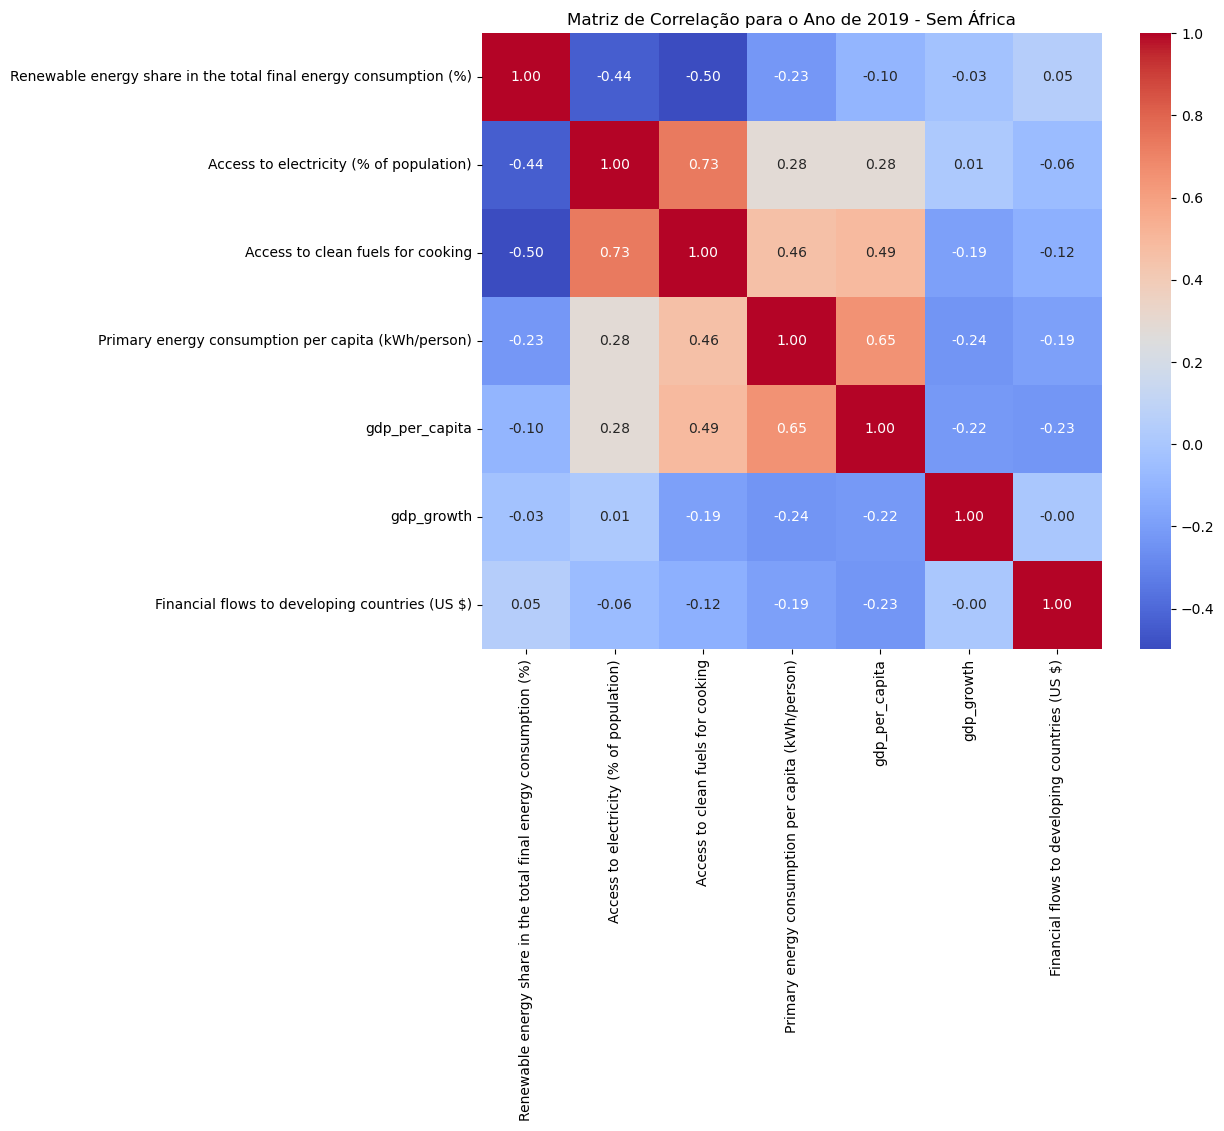

In [147]:
# Removendo os países africanos
data_sem_africa = data[~data['Entity'].isin(paises_africanos_presentes)]

# Filtrando os dados para o ano mais recente com informações (2019)
data_2019_sem_africa = data_sem_africa[data_sem_africa['Year'] == 2019]

# Matriz de correlação
matriz_correlacao_sem_africa = data_2019_sem_africa[variáveis_chave].corr()

# Criando matrizes de correlação para cada um dos três últimos anos
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao_sem_africa, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação para o Ano de 2019 - Sem África')
plt.show()

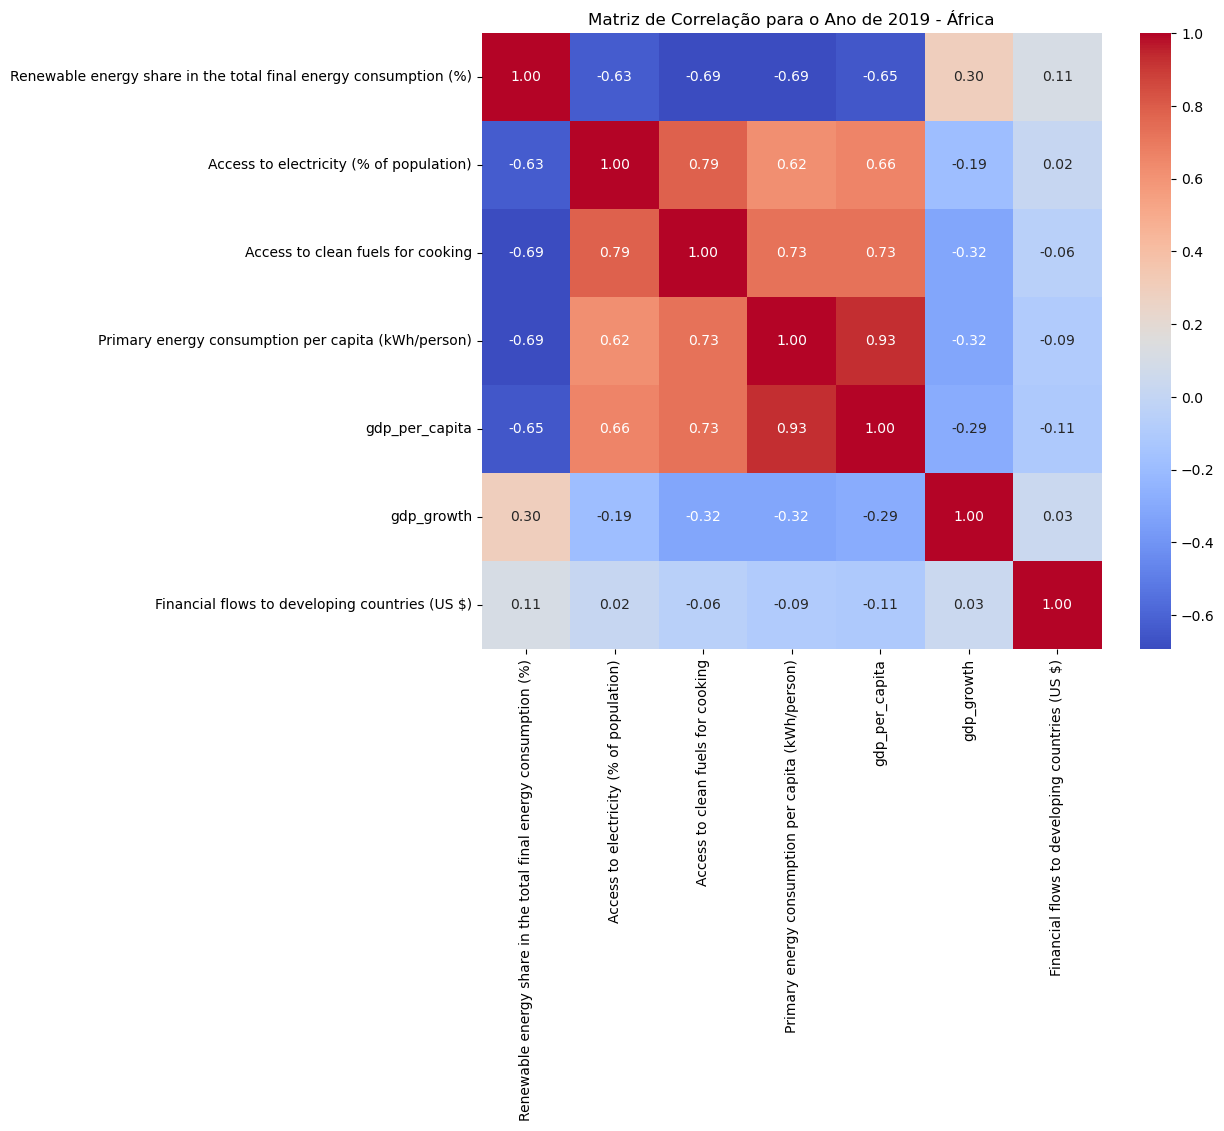

In [146]:
# Removendo os países africanos
data_africa = data[data['Entity'].isin(paises_africanos_presentes)]

# Filtrando os dados para o ano mais recente com informações (2019)
data_2019_africa = data_africa[data_africa['Year'] == 2019]

# Matriz de correlação
matriz_correlacao_africa = data_2019_africa[variáveis_chave].corr()

# Criando matrizes de correlação para cada um dos três últimos anos
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao_africa, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação para o Ano de 2019 - África')
plt.show()

Os coeficientes de correlação se mantiveram, apenas o `Crescimento do PIB` teve uma alteração significativa no sentido.